# Objective: manipulate , clean and query data using Pandas

* Reading different data files
* Accessing column names
* Converting One Data type into another
* Dataframe subsetting
    * **Rows based querying using iloc and loc**
    * **Column based querying using square brackets on the object itself**
* DataFrame Merging
    * **Merging using index as key**
        * outer join
        * inner join 
        * left/right join
    * **Merging using columns as key**
        * outer join
        * inner join 
        * left/right join
* GroupBy
* Pivot Tables
* Plotting data
* Missing value and outlier treatment
* Idiomatic Pandas

# Reading different data files
* Some useful arguments of pd.read_csv()
* names = [list of names as header], if no header is in the data
* skiprows = number of row to skip , if header is not in the top
* index_col = 0, if first column is index column, default will create an index starting from 0

In [200]:
# Reading the dataset in a dataframe using Pandas
#df = pd.read_csv("C:/Users/576902/Documents/1.COC/bank/bank1.csv", names = ['Var1','Var2',....], skiprows = n, index_col=0)
df = pd.read_csv("bank1.csv")
#Print first three observations
print df.head(3)                       

   age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   
2   35  management   single   tertiary      no     1350     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  


In [ ]:
# Load "Data" sheet of excel file EMP. if no name is given than "Sheet#" should be given
#df=pd.read_excel("C:/Users/576902/Documents/1.COC/bank/bank.xlsx", "Data") 
#print df

In [4]:
# Load Data from text file having tab ‘\t’ delimeter
#df=pd.read_csv(“C:/Users/576902/Documents/1.COC/bank/bank.txt”,sep=’\t’)  
#print df

# Accessing column names

In [28]:
# gives the column names, u stands for unicode
column_list = list(df.columns)
column_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [33]:
Var_Type = df.dtypes 
Var_Type_List
# type(Var_Type_List)    # pandas.core.series.Series

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
# .info() function is also used to get dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [7]:
# group by column names by its data type, dtype('O') stands for object data type
df.columns.to_series().groupby(df.dtypes).groups     

{dtype('int64'): ['age',
  'balance',
  'day',
  'duration',
  'campaign',
  'pdays',
  'previous'],
 dtype('O'): ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'y']}

**Renaming Columns**

In [138]:
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
df.rename(columns={'y': 'Target'}, inplace=True)
df.columns
#df.columns = [will have to give new column names for all var as a list]

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'Target'],
      dtype='object')

# Converting One Data type into another

In [ ]:
srting_outcome = str(numeric_input) #Converts numeric_input to string_outcome
integer_outcome = int(string_input) #Converts string_input to integer_outcome
float_outcome = float(string_input) #Converts string_input to integer_outcome

# Dataframe subsetting
* Rows based querying using iloc and loc
* Column based querying using square brackets on the object itself
* We can query the DataFrame and Series objects through **Boolean masking**. And Boolean masking is a powerful filtering method which allows us to use broadcasting to determine what data should be kept in our analysis

In [11]:
# selecting only categorical variables and stroring in df1
df1 = df.select_dtypes(include=['object']) # "int64" for numeric
# count of unique value using .value_count()
df1['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [18]:
# can select multiple columns by giving list of variables
df_mul = df[['age', 'education']] 
#list_var = ['var1', 'var2',....]; df_mul = df[list_var]
df_mul.head(3)

,age,education
0,30,primary
1,33,secondary
2,35,tertiary


In [202]:
# uses row index/name if row index name available we can select particular row using df.loc['row_index']
df.loc[0]

age                  30
job          unemployed
marital         married
education       primary
default              no
balance            1787
housing              no
loan                 no
contact        cellular
day                  19
month               oct
duration             79
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 0, dtype: object

In [203]:
# creating a dataframe using multiple series
s10 = pd.Series(np.random.randint(0,10,5), index = ['one','two','three','four','five'])
s11 = pd.Series(np.random.randint(0,100,5), index = ['one','two','three','four','five'])
s12 = pd.Series(np.random.randint(0,1,5), index = ['one','two','three','four','five'])
df_test = pd.DataFrame([s10, s11, s12], index=['random1', 'random2', 'random3'])
df_test

,one,two,three,four,five
random1,8,6,5,4,2
random2,75,99,48,13,76
random3,0,0,0,0,0


In [204]:
df_test.loc['random1']

one      8
two      6
three    5
four     4
five     2
Name: random1, dtype: int32

In [206]:
# filtering a observation using lebels
df_test.loc['random1', 'two']

6

In [209]:
# selecting all rows and required columns using loc
df_test.loc[:,['one','two']]

,one,two
random1,8,6
random2,75,99
random3,0,0


In [208]:
# filtering using index and iloc
df_test.iloc[1,2] # 2nd row 3rd column

48

In [213]:
# will return row indicies where condition is true
df_test['one']>0

random1     True
random2     True
random3    False
Name: one, dtype: bool

In [216]:
# filtering using df.where()
gt_zero = df_test.where(df_test['one'] > 0)
gt_zero

,one,two,three,four,five
random1,8.0,6.0,5.0,4.0,2.0
random2,75.0,99.0,48.0,13.0,76.0
random3,NaN,NaN,NaN,NaN,NaN


In [217]:
# .dropna() is used to remove rows that contain Nan
gt_zero = df_test.where(df_test['one'] > 0).dropna()
gt_zero

,one,two,three,four,five
random1,8.0,6.0,5.0,4.0,2.0
random2,75.0,99.0,48.0,13.0,76.0


# DataFrame Merging

In [91]:
df_stores = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df_stores

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [92]:
# adding a new column manually 
df_stores['Date'] = ['December 1', 'January 1', 'mid-May']
df_stores

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [93]:
# converts index into a column
adf = df_stores.reset_index()
adf

,index,Cost,Item Purchased,Name,Date
0,Store 1,22.5,Sponge,Chris,December 1
1,Store 1,2.5,Kitty Litter,Kevyn,January 1
2,Store 2,5.0,Spoon,Filip,mid-May


In [94]:
# changing value of a column by index
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date
0,Store 1,22.5,Sponge,Chris,December 1
1,Store 1,2.5,Kitty Litter,Kevyn,NaN
2,Store 2,5.0,Spoon,Filip,mid-May


**Merging using index as key**

In [95]:
# creating to dataframe for merging
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')  # df.set_index used to convert a column into index
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
()
            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [101]:
# outer join (union) by index 
# pd.merge(df1,df2, how = 'outer'/'inner'/'left'/'right', left_index = True, right_index = True)
outer = pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)
outer

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [102]:
outer = pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True).reset_index()
#outer = outer.reset_index() # 
outer

,Name,Role,School
0,James,Grader,Business
1,Kelly,Director of HR,NaN
2,Mike,NaN,Law
3,Sally,Course liasion,Engineering


In [104]:
# inner join (intersection)
inner = pd.merge(staff_df, student_df, how = 'inner', left_index = True, right_index = True).reset_index()
inner

,Name,Role,School
0,James,Grader,Business
1,Sally,Course liasion,Engineering


In [105]:
# left join (retain everything from left dataframe and add matching column from left)
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [106]:
# right join (retain everything from right dataframe and add matching column from left)
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


**Merging using columns as key**

In [107]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name') 

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


**Using multiple columns as key**

In [109]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
# variable names should be provided as a list
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# GroupBy 

In [144]:
# computing avg age across job title
df.groupby('job').agg({'age': np.average})

,age
job,
admin.,39.682008
blue-collar,40.156448
entrepreneur,42.011905
housemaid,47.339286
management,40.540764
retired,61.869565
self-employed,41.453552
services,38.570743
student,26.821429


In [158]:
# computing min and max age across job title using .groupby and .agg()
min_max_age = df.groupby('job').agg({'age': np.min}).rename(columns={'age': 'min_age'})
min_max_age['max_age'] = df.groupby('job').agg({'age': np.min})['age']
min_max_age

,min_age,max_age
job,,
admin.,22,22
blue-collar,23,23
entrepreneur,23,23
housemaid,26,26
management,23,23
retired,24,24
self-employed,25,25
services,21,21
student,19,19


In [164]:
# if want to aggregate more than one variable
df.groupby('job').agg({'age': np.min, 'duration': np.max})

,duration,age
job,,
admin.,1713,22
blue-collar,2456,23
entrepreneur,2769,23
housemaid,1558,26
management,2087,23
retired,1386,24
self-employed,1877,25
services,1971,21
student,1124,19


In [161]:
# if we want same statistics for all variables than no need to create a dict as input for .agg()
df.groupby('job').agg(min)

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
job,,,,,,,,,,,,,,,,
admin.,22,divorced,primary,no,-967,no,no,cellular,1,apr,8,1,-1,0,failure,no
blue-collar,23,divorced,primary,no,-1400,no,no,cellular,1,apr,5,1,-1,0,failure,no
entrepreneur,23,divorced,primary,no,-2082,no,no,cellular,1,apr,10,1,-1,0,failure,no
housemaid,26,divorced,primary,no,-759,no,no,cellular,2,apr,15,1,-1,0,failure,no
management,23,divorced,primary,no,-1746,no,no,cellular,1,apr,4,1,-1,0,failure,no
retired,24,divorced,primary,no,-1206,no,no,cellular,1,apr,15,1,-1,0,failure,no
self-employed,25,divorced,primary,no,-3313,no,no,cellular,2,apr,9,1,-1,0,failure,no
services,21,divorced,primary,no,-1202,no,no,cellular,1,apr,5,1,-1,0,failure,no
student,19,married,primary,no,-230,no,no,cellular,2,apr,6,1,-1,0,failure,no


# Pivot Tables

In [173]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [187]:
# values: column on which aggfunc will act, index= row variable, column = column variable
# mean age across education clacification and across target
df.pivot_table(values='age',index = 'education', columns='Target', aggfunc=np.mean)

Target,no,yes
education,,
primary,46.276873,52.171875
secondary,39.895197,41.469388
tertiary,39.632671,39.725389
unknown,44.636905,51.157895


In [189]:
# mean and max age across education qualification and across marital status
df.pivot_table(values='age', index='education', columns='marital', aggfunc=[np.mean,np.max], margins=True)

mean                                      amax                 \
marital     divorced    married     single        All divorced married single   
education                                                                       
primary    51.392405  47.511407  37.013699  46.833333     84.0    87.0   60.0   
secondary  43.496296  42.404345  33.052545  40.062446     75.0    86.0   66.0   
tertiary   45.148387  41.777166  34.512821  39.645926     77.0    78.0   69.0   
unknown    50.375000  48.444444  34.652174  45.299465     79.0    73.0   53.0   
All        45.475379  43.454415  33.927258  41.170095     84.0    87.0   69.0   

                 
marital     All  
education        
primary    87.0  
secondary  86.0  
tertiary   78.0  
unknown    79.0  
All        87.0

# Scales
**There are four types of scales relevent for data science**
*  **Ratio scale**: In the ratio scale the measurements units are equally spaced and mathematical operations, such as subtract, division, and multiplication are all valid. Good examples of ratio scale measurements might be the height and weight.
      * units are equally spaced
      * mathematical operators +-*/ all works
      * e.g. weight, height
* **Interval scale**: In the interval scale the measurement units are equally spaced like the ratio scale. But there's no clear absence of value. That is there isn't a true zero, and so operation such as multiplication and division are not valid
     * e.g.: temperatures measured in Celsius or Fahrenheit. Since there's never an absence of temperature and 0 degrees is a meaningful value of temperature
* **Ordinal scale**: In the ordinal scale the order of values is important but the differences between the values are not equally spaced. e.g grading method, A and A+ are not same and also difference between A+ and A may not be equal to difference between A and A- 
* **Nominal scale/categorical data**: where changing order or applying functions are meaningless. e.g.: binary classification 

In [192]:
df_scale = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df_scale

,0
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [193]:
df_scale.rename(columns={0: 'Grades'}, inplace=True)
df_scale

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [195]:
# df.astype('var_name') is used to convert one scale type to another
df_scale['Grades'].astype('category').head() # notice dtype: category

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [199]:
# pd.get_dunmmy is used to get dummies for categorical variables
pd.get_dummies(df_scale['Grades'], prefix="Grades", prefix_sep='_')

,Grades_A,Grades_A+,Grades_A-,Grades_B,Grades_B+,Grades_B-,Grades_C,Grades_C+,Grades_C-,Grades_D,Grades_D+
excellent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
excellent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
excellent,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
good,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
good,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
good,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ok,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ok,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ok,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
poor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [196]:
# converting to ordinal
grades = df_scale['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head() # dtype: category but below that we can see the order

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [197]:
# as c< B- to A+ 
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

# Summary Statistics

In [35]:
# to get summary statistics of numeric variables
# we get 8 statistics namely (count, mean, std, min, 25%, 50%, 75%, max)
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [37]:
df.describe().T    # it is of type: pandas.core.frame.DataFrame

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [41]:
df.describe().T['count']
#type(df.describe().T['count'])   # after selecting a particular column will get a "pandas.core.series.Series"

age         4521.0
balance     4521.0
day         4521.0
duration    4521.0
campaign    4521.0
pdays       4521.0
previous    4521.0
Name: count, dtype: float64

In [52]:
df.describe().T[0:1]

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0


# Plotting data

**Histogram**

In [17]:
%matplotlib inline    # % is a magic command. If inline not given plots will open in a new window

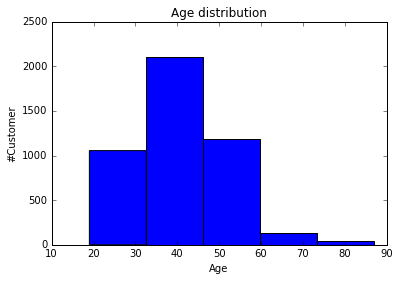

In [18]:
# matplotlib and seaborn are used for data visualization
import matplotlib.pyplot as plt
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['age'],bins = 5)
#Labels and Titles
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('#Customer')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000087BB438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009FEAFD0>]], dtype=object)

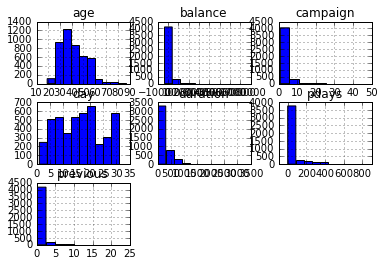

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist()

y
no     [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
yes    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

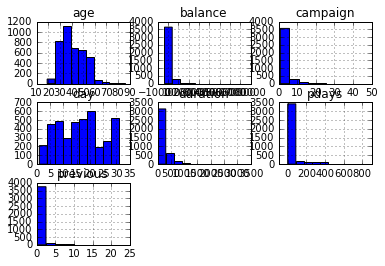

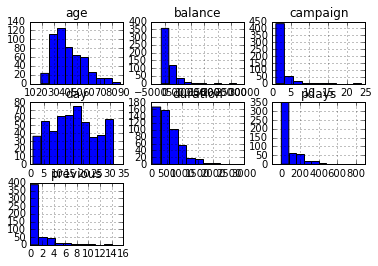

In [4]:
# Histogram of all numeric variables across taget level
df.groupby('y').hist()

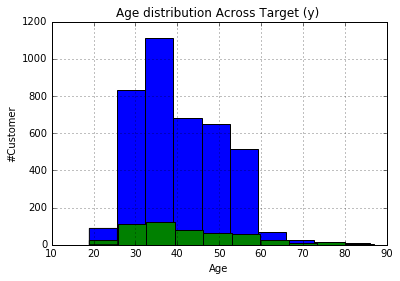

In [10]:
# Age distribution Across Target
df.groupby('y').age.hist(alpha=0.4)
plt.title('Age distribution Across Target (y) ')
plt.xlabel('Age')
plt.ylabel('#Customer')
#plt.show()

**Scatter Plot**

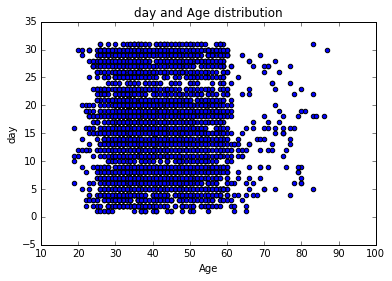

In [19]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure 
fig1=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig1.add_subplot(1,1,1)
#Variable
ax.scatter(df['age'],df['day'])
#Labels and Titles
plt.title('day and Age distribution')
plt.xlabel('Age')
plt.ylabel('day')
plt.show()

**Box Plot using seaborn**

In [ ]:
! pip install seaborn    # to install seaborn ("! conda install seaborn" can also be used)

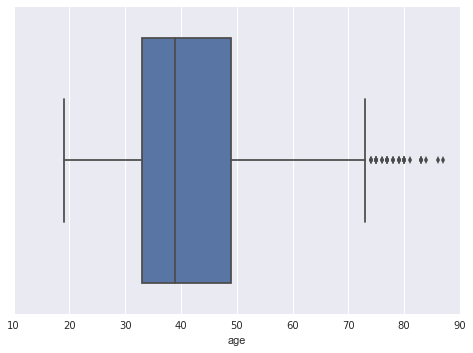

In [26]:
import seaborn as sns 
sns.boxplot(df['age']) 
sns.despine()

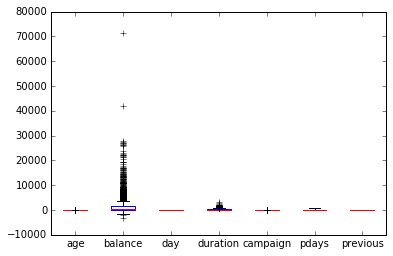

In [14]:
# Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot()
df.plot.box()


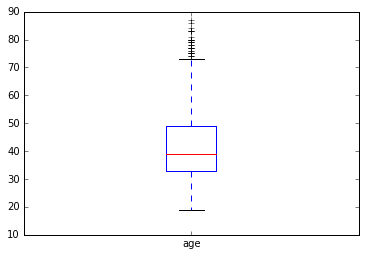

In [16]:
# we can see individual plots as grouped plot not making any sense
df['age'].plot.box()    # have outliers in age

**Group by**

# Missing value and outlier treatment

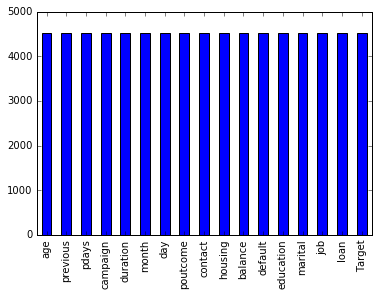

In [90]:
# Non-missing Count for all variables
df.describe(exclude=[None]).T.sort_values(by ='count', ascending = 'False')['count'].plot(kind = 'bar')

In [28]:
#Example to impute missing values in Age by the mean
import numpy as np
meanAge = np.mean(df.age)         # Using numpy mean function to calculate the mean value
df.Age = df.age.fillna(meanAge)   # replacing missing values in the DataFrame

# Idiomatic Pandas
* The soulutions in general have high performance and high readability
* Puthon has its own set of Idioms
* e.g.
    * **Method chaining** (every method on a object returns a reference to that object): The benefit oh method chaining is that one can condense many different operations on a DataFrame into one line or at least one statement of code.
    * **applymap**: apply some function which should operate on each cell of a DataFrame, and the return set is itself a DataFrame. 
    * **Apply**: To map across all of the rows in a DataFrame

In [111]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [125]:
# method chaining example
df.where((df['age']>30) & (df['marital']=='single')).dropna().rename(columns={'age': 'ageofcustomer'}).head(5)

,ageofcustomer,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no
5,35.0,management,single,tertiary,no,747.0,no,no,cellular,23.0,feb,141.0,2.0,176.0,3.0,failure,no
17,37.0,admin.,single,tertiary,no,2317.0,yes,no,cellular,20.0,apr,114.0,1.0,152.0,2.0,failure,no
22,44.0,services,single,secondary,no,106.0,no,no,unknown,12.0,jun,109.0,2.0,-1.0,0.0,unknown,no
33,32.0,management,single,tertiary,no,2536.0,yes,no,cellular,26.0,aug,958.0,6.0,-1.0,0.0,unknown,yes


# apply(function, index = 1) 
* To map across all of the rows in a DataFrame
* index = 1 to apply the function on all the rows

In [126]:
Credit_Card_Default = pd.read_csv('Credit_Card_Default.csv', skiprows = 1, index_col=0)
Credit_Card_Default.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [128]:
Credit_Card_Default.columns

Index([u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE', u'PAY_0',
       u'PAY_2', u'PAY_3', u'PAY_4', u'PAY_5', u'PAY_6', u'BILL_AMT1',
       u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5', u'BILL_AMT6',
       u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4', u'PAY_AMT5',
       u'PAY_AMT6', u'default payment next month'],
      dtype='object')

In [129]:
import numpy as np
# creating a mim_max function that will return min and max of a row of observations
def min_max(row):
    data = row[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [130]:
Credit_Card_Default.apply(min_max, axis=1)

,max,min
ID,,
1,3913,0
2,3455,1725
3,29239,13559
4,49291,28314
5,35835,5670
6,64400,19394
7,542653,367965
8,11876,-159
9,14096,3719


In [ ]:
# to create new columns 
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

In [134]:
# lambda function inside apply
rows = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
Credit_Card_Default['max_Bill_Amt']= Credit_Card_Default.apply(lambda x: np.max(x[rows]), axis=1)
Credit_Card_Default['Min_Bill_Amt'] = Credit_Card_Default.apply(lambda x: np.min(x[rows]), axis = 1)

In [135]:
Credit_Card_Default.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,max_Bill_Amt,Min_Bill_Amt
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,3913,0
2,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,3455,1725
3,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,29239,13559
